In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import integrate 
from scipy.signal import resample
import seaborn as sns
import scipy.io as sio
import h5py

     Time  Current
0  450000        6
1  450100        6
2  450200        6
3  450300        6
4  450400        6
Avarage during flight: 0.917579025660096A
Avarage during pre-flight: 0.08382960776043957A


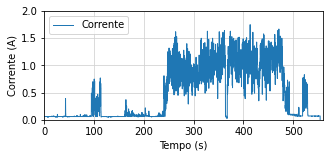

In [71]:
Voo1 = pd.read_csv('./Voo1.csv',names=['Time','Current'], sep=';')

time1 = Voo1['Time']
time1 = time1 - time1[0]
time1 = time1*0.001 
arrT1 = time1.to_numpy() # Converte para array
lim_T1 = arrT1[2371:5060] # Limita apenas o intervalo de voo

current1 = Voo1['Current']
current1 = current1/100
arrI1 = current1.to_numpy() # Converte para array
lim_I1 = arrI1[2371:5060] # Limita apenas o intervalo de voo
lim_I1p = arrI1[0:2371] # Limita apenas o intervalo de pre-voo
print(Voo1.head())
avg1 = sum(lim_I1)/len(lim_I1)
print(f'Avarage during flight: {avg1}A')
avg1p = sum(lim_I1p)/len(lim_I1p)
print(f'Avarage during pre-flight: {avg1p}A')

# Salva em formato.mat para usar no simulink
sio.savemat('time1.mat', {'time1': arrT1})
sio.savemat('current1.mat', {'current1': arrI1})

fig1 = plt.figure()
plt.plot(time1, current1, 'tab:blue', linewidth=1)
# plt.locator_params(axis='x', nbins=8)
plt.legend(['Corrente'])
plt.xlim([0,560])
plt.ylim([0,2])
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A)')
plt.grid(color = 'lightgray')
fig1.savefig('voo1.png', format='png', dpi=1200)

     Time  Current
0  200000        6
1  200100        6
2  200200        7
3  200300        7
4  200400        6
Avarage during flight: 0.9651989119347171A
Avarage during pre-flight: 0.08898950641274825A


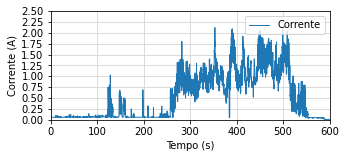

In [72]:
Voo2 = pd.read_csv('./Voo2.csv',names=['Time','Current'], sep=';')

time2 = Voo2['Time']
time2 = time2 - time2[0]
time2 = time2*0.001 
arrT2 = time2.to_numpy() # Converte para array
lim_T2 = arrT2[2573:5514] # Limita apenas o intervalo de voo

current2 = Voo2['Current']
current2 = current2/100
arrI2 = current2.to_numpy() # Converte para array
lim_I2 = arrI2[2573:5514] # Limita apenas o intervalo de voo
lim_I2p = arrI2[0:2573] # Limita apenas o intervalo de pre-voo
print(Voo2.head())
avg1 = sum(lim_I2)/len(lim_I2)
print(f'Avarage during flight: {avg1}A')
avg1p = sum(lim_I2p)/len(lim_I2p)
print(f'Avarage during pre-flight: {avg1p}A')

# Salva em formato.mat para usar no simulink
sio.savemat('time2.mat', {'time2': arrT2})
sio.savemat('current2.mat', {'current2': arrI2})

fig1 = plt.figure()
plt.plot(time2, current2, 'tab:blue', linewidth=1)
plt.legend(['Corrente'], loc='upper right')
plt.xlim([0,600])
plt.ylim([0,2.5])
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A)')
plt.locator_params(axis='y', nbins=12)
plt.grid(color = 'lightgray')
fig1.savefig('voo2.png', format='png', dpi=1200)

In [73]:
Totalint1 = integrate.trapz(current1,time1)
Totalint1p = integrate.trapz(lim_I1,lim_T1)
print(f'Consumo Total: {Totalint1*0.277778} mAh')
print(f'Consumo Total Voo: {Totalint1p*0.277778} mAh')
print(f'Consumo Total Pré-Voo: {Totalint1*0.277778 - Totalint1p*0.277778} mAh')

Totalint2 = integrate.trapz(current2,time2)
Totalint2p = integrate.trapz(lim_I2,lim_T2)
print(f'Consumo Total: {Totalint2*0.277778} mAh')
print(f'Consumo Total Voo: {Totalint2p*0.277778} mAh')
print(f'Consumo Total Pré-Voo: {Totalint2*0.277778 - Totalint2p*0.277778} mAh')

Consumo Total: 76.12644978999998 mAh
Consumo Total Voo: 68.53616593999999 mAh
Consumo Total Pré-Voo: 7.590283849999992 mAh
Consumo Total: 85.75326304700003 mAh
Consumo Total Voo: 78.84936863500003 mAh
Consumo Total Pré-Voo: 6.903894412 mAh


(<Figure size 360x144 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x143e7082850>])

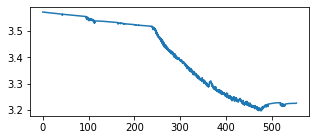

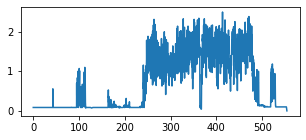

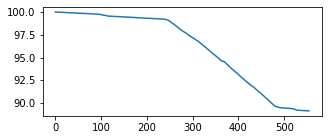

In [74]:
filepath = '../corrente/V1.mat'
V1 = {}
v1 = h5py.File(filepath)
for k, v in v1.items():
    V1[k] = np.array(v)

plt.figure(), plt.plot(V1['Voltage'][:,0],V1['Voltage'][:,1])


filepath = '../corrente/C1.mat'
C1 = {}
c1 = h5py.File(filepath)
for k, v in c1.items():
    C1[k] = np.array(v)

plt.figure(), plt.plot(C1['Voltage'][:,0],C1['Voltage'][:,1])


filepath = '../corrente/SOC1.mat'
SOC1 = {}
soc1 = h5py.File(filepath)
for k, v in soc1.items():
    SOC1[k] = np.array(v)

plt.figure(), plt.plot(SOC1['Voltage'][:,0],SOC1['Voltage'][:,1])


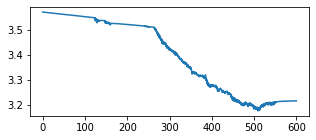

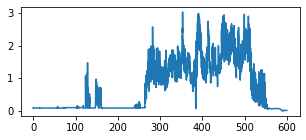

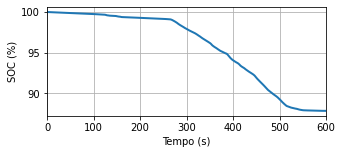

In [75]:
f = h5py.File('../corrente/V2.mat','r')
V2 = f.get('Voltage')
V2 = np.array(V2) # For converting to a NumPy array

plt.figure(), plt.plot(V2[:,0],V2[:,1])


f = h5py.File('../corrente/C2.mat','r')
C2 = f.get('Voltage')
C2 = np.array(C2) # For converting to a NumPy array

plt.figure(), plt.plot(C2[:,0],C2[:,1])


f = h5py.File('../corrente/SOC2.mat','r')
SOC2 = f.get('Voltage')
SOC2 = np.array(SOC2) # For converting to a NumPy array

plt.figure(), plt.plot(SOC2[:,0],SOC2[:,1], color='tab:blue', linewidth=2)
plt.xlabel('Tempo (s)')
plt.ylabel('SOC (%)')
plt.xlim([0,600])
plt.grid()


Text(0.5, 0, 'Tempo (s)')

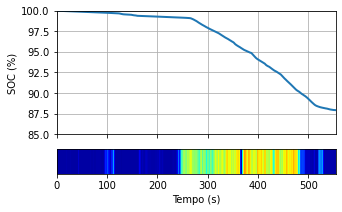

In [92]:
fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True, figsize=(5,3),gridspec_kw={'height_ratios': [5,1]})
x = arrT1
y = arrI1

ax.plot(SOC2[:,0],SOC2[:,1], color='tab:blue', linewidth=2)
ax.set_xlim([0,600])
ax.set_ylabel('SOC (%)')
ax.grid()
ax.set_ylim([85,100])
ax.locator_params(nbins = 6)

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,max(y)]
ax2.imshow(y[np.newaxis,:], cmap="jet", aspect="auto", extent=extent)
ax2.set_yticks([])
ax2.set_xlim(extent[0], extent[1])
ax2.set_xlabel('Tempo (s)')

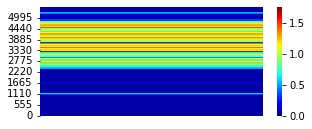

In [77]:
d = {'Current': arrI1}
df = pd.DataFrame(data=d)
df.head()

fig = plt.figure()
ax = fig.subplots()
ax = sns.heatmap(df, annot = False, linewidths=0, cmap = 'jet', xticklabels = False)
ax.invert_yaxis()
# ax.set_xlabel('States')
# ax.set_ylabel('Day n°')

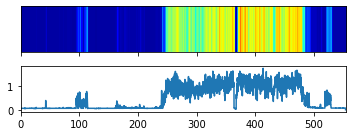

In [78]:
fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)
x = arrT1
y = arrI1

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,max(y)]
ax.imshow(y[np.newaxis,:], cmap="jet", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])


ax2.plot(x,y)

plt.tight_layout()